In [1]:
%matplotlib inline #this line makes matplotlib plots show directly in the notebook
import pandas
import matplotlib.pyplot as plt

In [2]:
#read in the input data. Skip the first line as a header line.
df = pandas.read_csv('datalog_Richards_Hall.csv', header=1, sep=',', index_col=0, parse_dates=True,infer_datetime_format=True, low_memory=False)

In [29]:
# Get one day of data
beginDate = '2017-03-04 00:00:00'
endDate = '2017-03-04 23:59:59'
df_sub = df[beginDate:endDate]

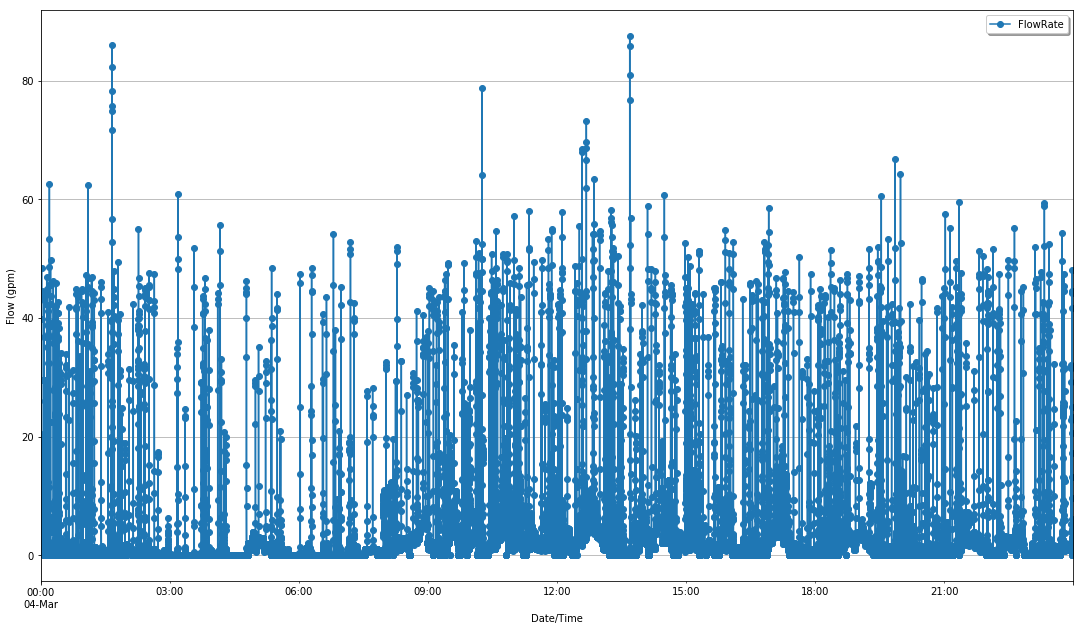

In [46]:
#Plot just the FlowRate variable
df_sub.plot(y = 'FlowRate', marker='o')
#get current axes
ax = plt.gca()
#  set the x and y-axis labels
ax.set_ylabel('Flow (gpm)')
ax.set_xlabel('Date/Time')
# set the x and y-axis limits
ax.set_xlim([df_sub.index[0], df_sub.index[-1]])
ax.grid(True)
#  Add a legend with some customizations
legend = ax.legend(loc='upper right', shadow=True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [51]:
#aggregate data to hourly time step
df_sub = df.resample(rule='1H', base=0).sum()

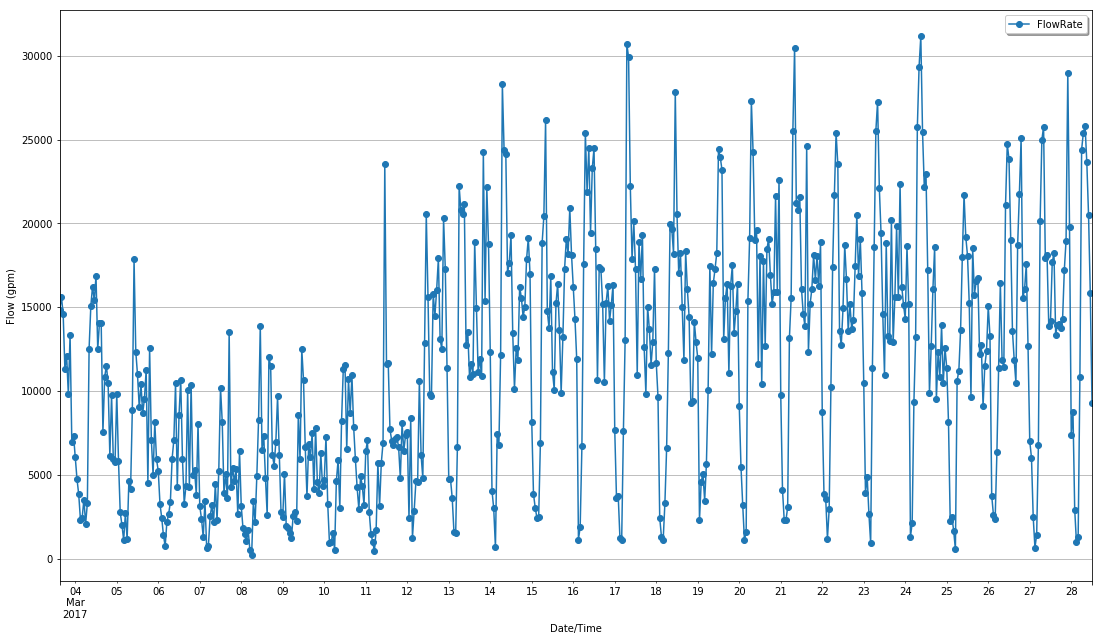

In [52]:
#Plot just the FlowRate variable
df_sub.plot(y = 'FlowRate', marker='o')
#get current axes
ax = plt.gca()
#  set the x and y-axis labels
ax.set_ylabel('Flow (gpm)')
ax.set_xlabel('Date/Time')
# set the x and y-axis limits
ax.set_xlim([df_sub.index[0], df_sub.index[-1]])
ax.grid(True)
#  Add a legend with some customizations
legend = ax.legend(loc='upper right', shadow=True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

Plot is for each hour of the day and across all days in the period of record including error bars showing +/- 1 standard deviation in water use for that hour

In [55]:
# First aggregate the incremental flow volume to a
#  total volume for each hourly time step
hourlyTotVol = df['IncrementalVolume'].resample(rule='1H', base=0).sum()

In [57]:
# Calculate an average volume for each hour
#  of the day by aggregating across days using
#  the groupby function
hourlyAvgVol = hourlyTotVol.groupby(hourlyTotVol.index.hour).mean()

# Also calculate the standard deviation for each hour
hourlyStDevVol = hourlyTotVol.groupby(hourlyTotVol.index.hour).std()

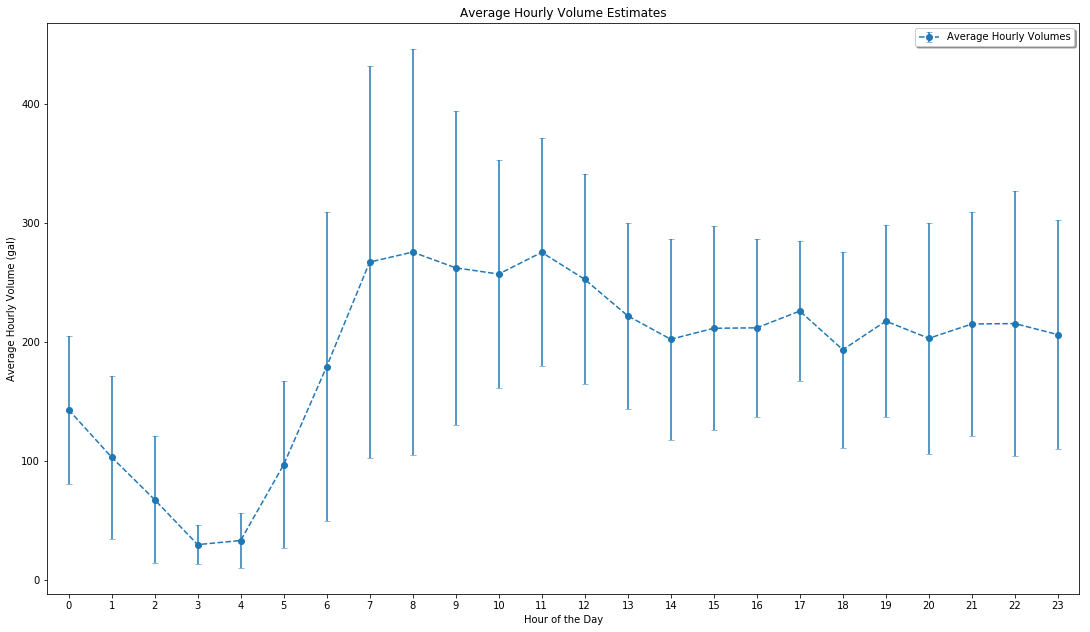

In [74]:
# Generate a plot of the data with some indication of the variability in
#  the hourly average values (e.g., add error bars with +- one Std. Dev.)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.errorbar(x=hourlyAvgVol.index, y=hourlyAvgVol,            
    yerr=hourlyStDevVol, capsize=3,         
    capthick=0.5, fmt='--',        
    label='Average Hourly Volumes', marker='o')

# Set the limits on the x-axis and the tick 
#  mark locations
ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
plt.xticks(xmarks)

# Set the x and y-axis labels and title
ax.set_ylabel('Average Hourly Volume (gal)')
ax.set_xlabel('Hour of the Day')
ax.grid(False)
plt.title('Average Hourly Volume Estimates')

#set figure size and save figure
legend = ax.legend(loc='upper right', shadow=True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)

In [67]:
# add a new column to the dataset that in the day of the week (0 = Monday, 6 = Sunday)
df['weekday'] = df.index.weekday

In [68]:
#show the result of the above with the new weekday column
df.head()

,RecordNumber,SensorVoltage,FlowRate,AvgFlowRate,IncrementalVolume,TotalizedVolume,weekday
Date,,,,,,,
2017-03-03 15:10:12,1,0.816,1.000,1.000,0.016667,0.016667,4
2017-03-03 15:10:13,2,0.816,1.000,1.000,0.016667,0.033333,4
2017-03-03 15:10:14,3,1.374,35.875,35.875,0.597917,0.631251,4
2017-03-03 15:10:15,4,1.220,26.250,26.250,0.437500,1.068751,4
2017-03-03 15:10:16,5,1.038,14.875,14.875,0.247917,1.316668,4


In [69]:
#create a dataset that includes just the weekday (and not weekend) values
df_weekday = df[(df.weekday >= 0) & (df.weekday <= 5)]

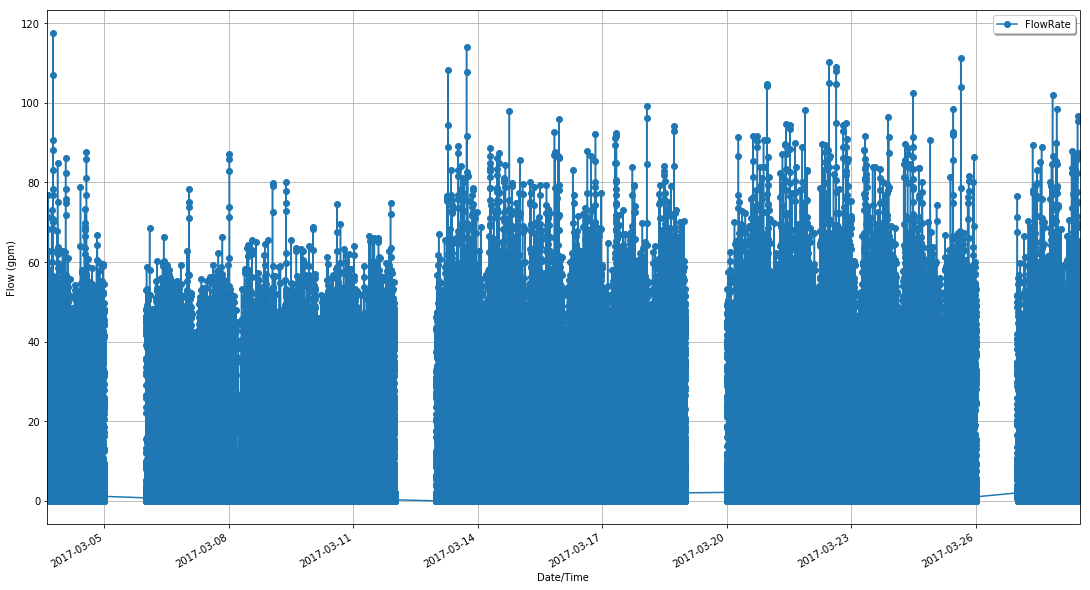

In [71]:
#Plot this new weekday dataset to show the filter worked correctly
df_weekday.plot(y = 'FlowRate', marker='o')
#get current axes
ax = plt.gca()
#  set the x and y-axis labels
ax.set_ylabel('Flow (gpm)')
ax.set_xlabel('Date/Time')
# set the x and y-axis limits
ax.set_xlim([df_sub.index[0], df_sub.index[-1]])
ax.grid(True)
#  Add a legend with some customizations
legend = ax.legend(loc='upper right', shadow=True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)